In [51]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
import xgboost, shap, math

# load JS visualization code to notebook
shap.initjs()

# train XGBoost model
X,y = shap.datasets.boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [29]:
X_train.shape

(379, 13)

In [30]:
%time rf_model = RandomForestRegressor().fit(X_train, y_train)

CPU times: user 35.5 ms, sys: 2.63 ms, total: 38.2 ms
Wall time: 35.9 ms


In [31]:
%time xg_model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X_train, label=y_train), 100)

[16:34:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[16:34:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[16:34:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[16:34:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[16:34:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[16:34:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=5
[16:34:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=5
[16:34:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[16:34:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_

In [32]:
# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
xg_explainer = shap.TreeExplainer(xg_model)
xg_shap_values = xg_explainer.shap_values(X)

In [33]:
# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
rf_explainer = shap.TreeExplainer(rf_model)
rf_shap_values = rf_explainer.shap_values(X)

In [36]:
def rmse(x,y): 
    return math.sqrt(((x-y)**2).mean())

def print_score(m):
    train_err = rmse(m.predict(X_train), y_train)
    train_score = m.score(X_train, y_train)
    test_err = rmse(m.predict(X_test), y_test)
    test_score =  m.score(X_test, y_test)
    print('Train RMSE: {}, Train Accuracy: {}'.format(train_err,train_score))
    print('Validation RMSE: {}, Validation Accuracy: {}'.format(test_err,test_score))
    if hasattr(m, 'oob_score_'):
        print('OOB Score: {}'.format(m.oob_score_))

In [52]:
print_score(rf_model)

Train RMSE: 1.4990231647805892, Train Accuracy: 0.9716897465696449
Validation RMSE: 3.2106206626398706, Validation Accuracy: 0.8959393914600943


In [20]:
# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(xg_explainer.expected_value, xg_shap_values[0,:], X.iloc[0,:])

In [21]:
# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(rf_explainer.expected_value, rf_shap_values[0,:], X.iloc[0,:])

In [40]:
# visualize the training set predictions
shap.force_plot(xg_explainer.expected_value, xg_shap_values, X)

In [41]:
# visualize the training set predictions
shap.force_plot(rf_explainer.expected_value, rf_shap_values, X)

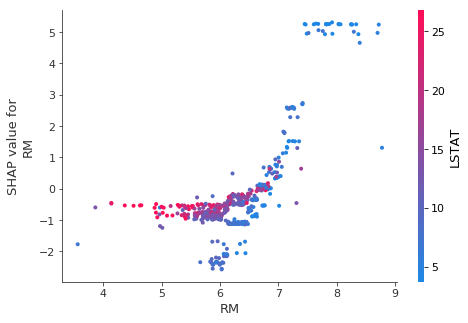

In [42]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("RM", xg_shap_values, X)

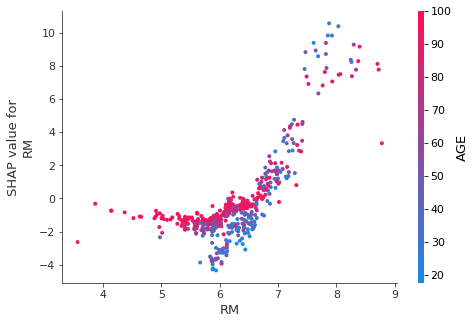

In [43]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("RM", rf_shap_values, X)

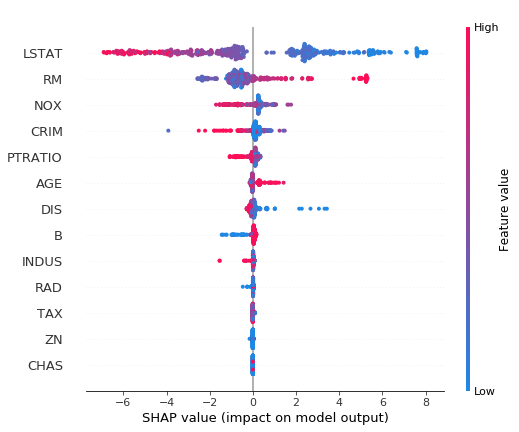

In [45]:
# summarize the effects of all the features
shap.summary_plot(xg_shap_values, X)

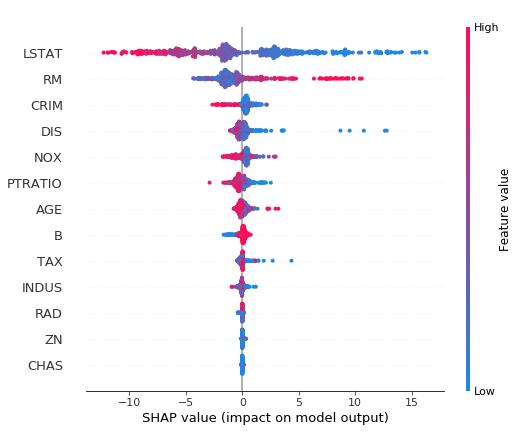

In [46]:
# summarize the effects of all the features
shap.summary_plot(rf_shap_values, X)

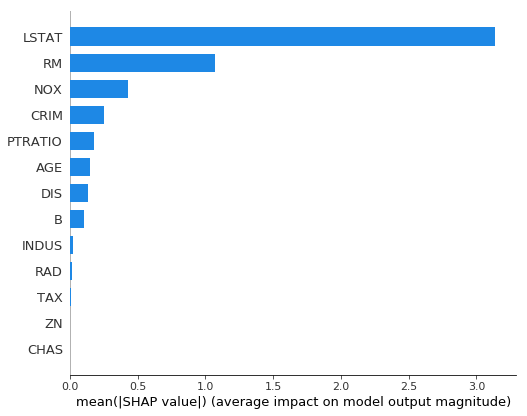

In [48]:
# summarize the effects of all the features
shap.summary_plot(xg_shap_values, X,plot_type='bar')

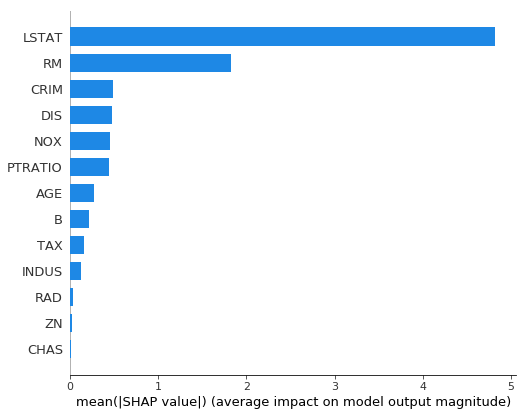

In [49]:
# summarize the effects of all the features
shap.summary_plot(rf_shap_values, X,plot_type='bar')